<img src="img/soal.png" width = "500">

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model


In [70]:
df = pd.read_excel(r'owid-covid-data.xlsx',engine='openpyxl')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84754,ZWE,Africa,Zimbabwe,2021-04-24,38064.0,19.0,52.143,1556.0,0.0,0.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
84755,ZWE,Africa,Zimbabwe,2021-04-25,38086.0,22.0,47.857,1557.0,1.0,0.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
84756,ZWE,Africa,Zimbabwe,2021-04-26,38102.0,16.0,34.714,1560.0,3.0,1.000,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
84757,ZWE,Africa,Zimbabwe,2021-04-27,38164.0,62.0,41.286,1565.0,5.0,1.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [71]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

Persempit Data agar hanya berisi kolom yang dibutuhkan untuk analisis data

In [72]:
df = df[['continent','location','date','total_cases','new_cases','new_deaths','total_vaccinations']]

***NaN replacing section***

In [73]:
df.dropna(subset=['continent'],inplace=True)

<ipython-input-73-ae4bd63bac51>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['continent'],inplace=True)


**NO 1 , TOTAL CASES FROM EACH CONTINENT**

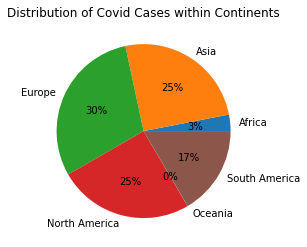

In [74]:
df.groupby(['continent'])['new_cases'].sum().plot(kind='pie',autopct  = "%1.0f%%")
plt.title('Distribution of Covid Cases within Continents')
plt.ylabel('')
plt.show()

Dapat disimpulkan 2 region benua dengan kasus total paling banyak = Europe

**NO.2 , TOTAL CASES FROM EACH COUNTRY IN ASIA**

In [75]:
yy = list(df.loc[df.continent=='Asia'].groupby('location')['new_cases'].sum().sort_values(ascending=True).values)

df.loc[df.continent=='Asia'].groupby('location')['new_cases'].sum().sort_values(ascending=True).plot(kind='barh',figsize=(20,20))

for index, value in enumerate(yy):
    plt.text(value, index,str(int(value)))

plt.xlabel("Total Cases(x 10^7)",fontsize = 23)
plt.ylabel("Country",fontsize = 23)
plt.xticks(fontsize=20)
plt.yticks(fontsize=12)
plt.grid()
plt.show()

TypeError: 'list' object is not callable

**NO 3 , TOTAL DEATHS IN ASEAN COUNTRIES**

In [9]:
dataAsean = df.loc[(df.location == 'Brunei') | (df.location == 'Laos') | (df.location == 'Cambodia') | (df.location == 'Indonesia') | (df.location == 'Malaysia') |(df.location == 'Myanmar') | (df.location == 'Philippines') | (df.location == 'Singapore') | (df.location == 'Thailand') | (df.location == 'Vietnam')]

In [10]:
y = list(dataAsean.groupby('location').sum()['new_deaths'].sort_values().values)

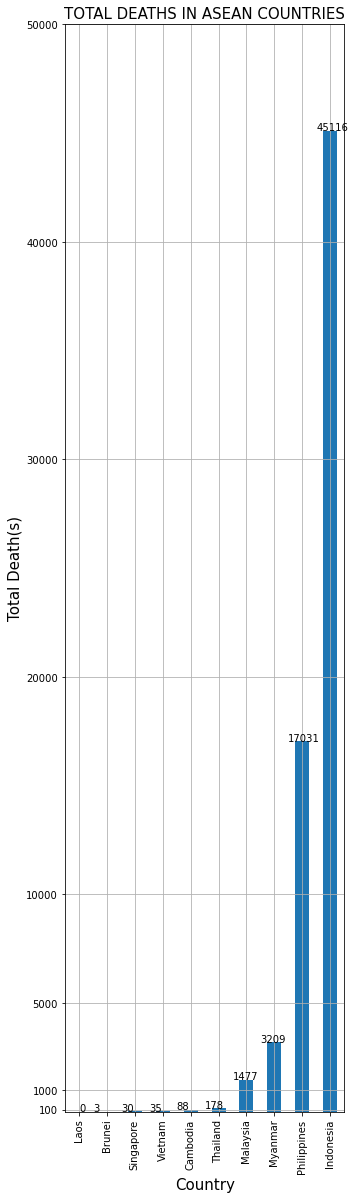

In [11]:
dataAsean.groupby('location').sum()['new_deaths'].sort_values().plot(kind='bar',figsize=(5,20))
for index, value in enumerate(y):
    if index!=0:
        index-=0.5
    plt.text(index, value,str(int(value)))

plt.grid()
plt.title("TOTAL DEATHS IN ASEAN COUNTRIES",fontsize=15)
plt.ticklabel_format(style='plain',axis = "y")
plt.xlabel('Country',fontsize = 15)
plt.ylabel('Total Death(s)',fontsize = 15)
plt.yticks([100,1000,5000,10000,20000,30000,40000,50000])
plt.show()

Laos adalah negara ASEAN dengan jumlah kematian akibat pandemi Covid-19 terendah

**NO 4 , IMPACT OF VACCINATION TO THE PANDEMIC SPREAD** <br/>
Kita pilih negara teratas dalam kategori total vaksinasi

In [12]:
#Daftar negara teratas dalam distribusi total vaksinasi
vaccines = df.groupby('location')['total_vaccinations'].sum().sort_values(ascending=False).head(10)
vaccines

location
United States     1.077240e+10
China             6.426019e+09
India             4.168955e+09
United Kingdom    2.600558e+09
Brazil            1.237604e+09
Turkey            1.049193e+09
Germany           1.048992e+09
Israel            8.536964e+08
France            7.883386e+08
Italy             7.494636e+08
Name: total_vaccinations, dtype: float64

**4 NEGARA YANG DIPAKAI UNTUK PERBANDINGAN DATA**

In [13]:
listCountry = df.loc[(df.location == "United States") | (df.location == "Turkey") | (df.location== "United Kingdom") | (df.location == "Brazil")]

***Data Filling Section for NaN value in total_vaccinations*** <br/><br/>
(US ,  TURKEY ,  UK , BRAZIL) <br/>
Bagian ini diperlukan karena didapati terdapat anomali data pada total vaccinatons sebagaimana ditunjukan pada grafik raw data berikut <br/><br/>
<img src="img/tv.PNG" width = "500"> <br/><br/> 
Nilai NaN pada data semenjak vaksinasi dimulai harus diisi sesuai dengan parameter tertentu agar data pada grafik rapih

**!! BAGIAN INI JANGAN DI RUN LEBIH DARI SEKALI!! (apabila di run lebih dari 1x , runn ulang notebook)**

In [14]:
#mencari index/data terkecil dengan value bukan NaN (alias sudah ada vaksinasi pertama)

brDate = listCountry.loc[(listCountry['total_vaccinations'].isnull() ==False) & (listCountry['location']=="Brazil")].head(1).date.values[0]

usDate = listCountry.loc[(listCountry['total_vaccinations'].isnull() ==False) & (listCountry['location']=="United States")].head(1).date.values[0]

ukDate = listCountry.loc[(listCountry['total_vaccinations'].isnull() ==False) & (listCountry['location']=="United Kingdom")].head(1).date.values[0]

tkDate = listCountry.loc[(listCountry['total_vaccinations'].isnull() ==False) & (listCountry['location']=="Turkey")].head(1).date.values[0]

#mengisi value 0.0  untuk data sebelum tanggal vaksinasi pertama bagi masing2 negara
listCountry.loc[(listCountry.location == "Brazil") & (listCountry.date <brDate)] = listCountry.loc[(listCountry.location == "Brazil") & (listCountry.date <brDate)].fillna(0)

listCountry.loc[(listCountry.location == "United States") & (listCountry.date <usDate)] = listCountry.loc[(listCountry.location == "United States") & (listCountry.date <usDate)].fillna(0)

listCountry.loc[(listCountry.location == "United Kingdom") & (listCountry.date <ukDate)] = listCountry.loc[(listCountry.location == "United Kingdom") & (listCountry.date <ukDate)].fillna(0)

listCountry.loc[(listCountry.location == "Turkey") & (listCountry.date <tkDate)] = listCountry.loc[(listCountry.location == "Turkey") & (listCountry.date <tkDate)].fillna(0)

#mengisi mean data sebelum dan sesudah untuk tanggal semenjak vaksinasi di masing2 negara dimulai
listCountry['total_vaccinations'] = pd.concat([listCountry['total_vaccinations'].ffill(), listCountry['total_vaccinations'].bfill()]).groupby(level=0).mean()


D:\Anaconda\lib\site-packages\pandas\core\indexing.py:1717: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)
<ipython-input-14-cdd3cde934e9>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listCountry['total_vaccinations'] = pd.concat([listCountry['total_vaccinations'].ffill(), listCountry['total_vaccinations'].bfill()]).groupby(level=0).mean()


Total Vaksinasi sepanjang waktu dari 4 negara yang dipilih

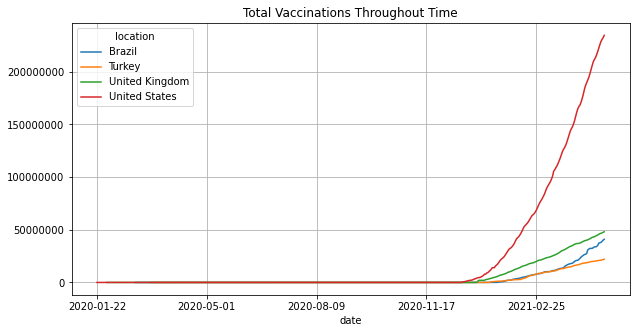

In [15]:
listCountry.groupby(['date','location'])['total_vaccinations'].sum().unstack().plot(figsize = (10,5))
plt.ticklabel_format(style='plain',axis = "y")
plt.title('Total Vaccinations Throughout Time')
plt.grid()
plt.show()

Jumlah Kasus Baru sepanjang waktu dari 4 negara yang dipilih

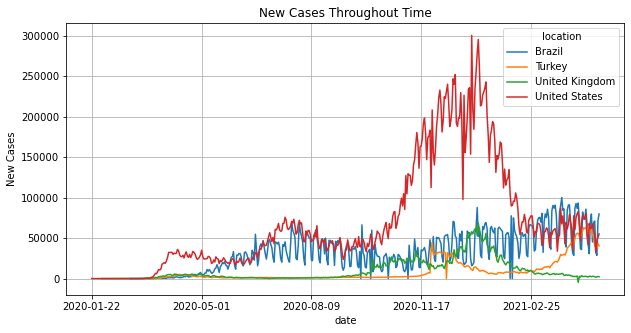

In [16]:
listCountry.groupby(['date','location'])['new_cases'].sum().unstack().plot(figsize= (10,5))
plt.grid()
plt.ylabel('New Cases')
plt.title('New Cases Throughout Time')
plt.show()

Total Akumulasi kasus dari 4 negara yang dipilih

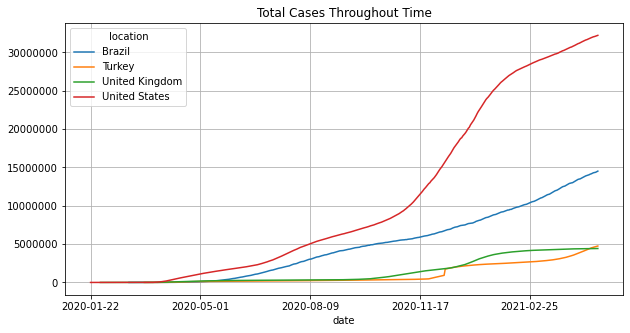

In [17]:
listCountry.groupby(['date','location'])['total_cases'].sum().unstack().plot(figsize = (10,5))
plt.grid()
plt.ticklabel_format(style='plain',axis = "y")
plt.title('Total Cases Throughout Time')
plt.show()

**ANALISIS DATA BERDASARKAN 3 GRAFIK** <br/><br/>
<img src="img/newtv.PNG" width = "500"> <br/>
<img src="img/nv.PNG" width = "500"> <br/>
<img src="img/tc.PNG" width = "500"> <br/><br/>
Dari ketiga grafik tersebut , kita dapat melihat pada sumbu-x bahwa time line yang digunakan sama adanya untuk memudahkan melihat fluktuasi dari jumlah terhitung pada ketiga faktor yang ditinjau.<br/>
<br/>
Dapat dilihat bahwa prosedur vaksinasi mulai pesat dilakukan sekitar pertengahan 17 November 2020 dan 25 Februari 2021 , atau dapat kita sebut akhir Desember. Hal ini berlaku untuk ke-4 negara tinjauan walau dengan volume yang berbeda (US lebih tinggi) <br/><br/>
Apabila kita tinjau grafik ke-2 yakni grafik **NEW CASES THROUGHOUT TIMES** , dapat dilihat bahwa kasus baru menurun semenjak bertambahnya volume vaksinasi untuk 3 negara yakni US,UK, dan Turkey. Namun, hal ini tidak berlaku untuk Brazil dimana program vaksinasi tampaknya tidak memengaruhi laju pertambahan rata-rata kasus baru ke depannya. Hal ini didukung dengan fakta pada grafik ke-3 yakni grafik **TOTAL CASES THROUGHUT TIMES** dimana ke-3 negara selain Brazil cenderung melandai untuk pertambahan total kasus infeksi Covid. Di lain sisi, Brazil cenderung menunjukkan linearitas dari pertambahan kasusnya.<br/> <br/>
Kesimpulannya adalah program vaksinasi di US, UK , dan Turkey berhasil dan cenderung menekan laju penyebaran Covid, tetapi tidak untuk Brazil sehingga diperlukan adanya peninjauan ulang.


***ML MODELLING SECTION***

In [76]:
#LINEAR REGRESSION MODEL FOR TOTAL CASES SECTION
print("First US Vaccinations date :",usDate)

First US Vaccinations date : 2020-12-20


In [22]:
listCountry.location.value_counts()

United States     463
United Kingdom    454
Brazil            428
Turkey            414
Name: location, dtype: int64

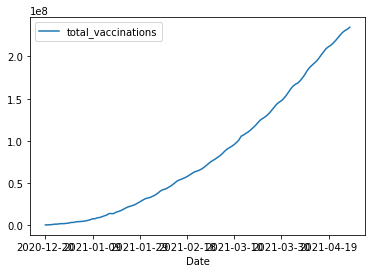

In [46]:
listCountry.loc[(listCountry.location=="United States") & (listCountry.date >= usDate)].plot(x="date" , y="total_vaccinations")
# plt.xticks(['2020-12-20' , '2021-1-20' , '2021-2-20','2021-3-20'])
plt.xlabel("Date")
plt.show()


In [77]:
from sklearn.model_selection import train_test_split
lin = linear_model.LinearRegression()

base = listCountry.loc[(listCountry.location=="United States") & (listCountry.date >= usDate)][['date','total_vaccinations']]

newDate = [i for i in range(1,len(base)+1)]

# for i in range(1,len(base)+1):
#     base.at[i-1,'date'] = i

# base
# x,y = base.date , base.total_vaccinations

# train_x,test_x,train_y,test_y = train_test_split(x,y ,test_size = 0.2)

# lin.fit(train_x,train_y)

# pred = lin.predict(test_x)

# plt.scatter(test_x,test_y)
# plt.plot(test_x,pred)

# plt.show()

In [78]:
base

,date,total_vaccinations
80686,2020-12-20,556208.0
80687,2020-12-21,614117.0
80688,2020-12-22,811071.0
80689,2020-12-23,1008025.0
80690,2020-12-24,1476305.0
...,...,...
80811,2021-04-24,225640460.0
80812,2021-04-25,228661408.0
80813,2021-04-26,230768454.0
80814,2021-04-27,232407669.0
